In [1]:
import requests

def getdata(num,name):

    url='http://20.51.192.43:8080/mobility/getData?offset=0&limit=%d&name=%s' %(num,name)
    res=requests.get(url)

    locationList=[]
    data2=res.json()

    data=data2['content']
    for i in range(len(data)):
        X,y,t=data[i]['latitude'],data[i]['longitude'],data[i]['unixTime']
        lati=float(X)
        long=float(y)
        a=t.split('|')
        t=a[0]
        t=float(t)
        locationList.append([t,lati,long])

    
    return locationList

In [2]:
#DATA PREPROCESSING
import numpy as np
import math


def Preprocessing(Path):#Trajectory Path Path
    ProcessedPath=np.array([])# N X N matrix
    ProcessedPathSet=np.array([])
    Label=np.array([])
    pre=np.array([])
    
    for j in range(1,k+1):
        for i in range(j):
            ProcessedPath[i]=Path[i]
            pre=np.append(pre,Path[i])
        Label=np.append(Label,pre[-1])
        ProcessedPathSet=np.append(ProcessedPathSet,ProcessedPath)
    Label=np.append(Label,0)
    Label=np.delete(Label,0)
    ProcessedPathSet=np.reshape(ProcessedPathSet,(k,N*N))
    
    return [ProcessedPathSet,Label] # A set of Trajectory ProcessedPathSet ProcessedPathSet, A set of Label label

In [3]:
OMG=getdata(500,'omg')

In [4]:
import numpy as np
data=np.array(OMG)
print(data.shape)
print(data)

(500, 3)
[[1.57517604e+09 3.75438833e+01 1.26951255e+02]
 [1.57517605e+09 3.75438833e+01 1.26951382e+02]
 [1.57517605e+09 3.75437250e+01 1.26951757e+02]
 ...
 [1.57705839e+09 3.75477467e+01 1.26929270e+02]
 [1.57705839e+09 3.75477550e+01 1.26929363e+02]
 [1.57705840e+09 3.75477500e+01 1.26929463e+02]]


In [5]:
#DATA PREPROCESSING
import numpy as np
import math


def Preprocessing(Path):#Trajectory Path Path
    k=len(Path)
    N=math.ceil(k**0.5)
    ProcessedPath=np.zeros(N*N)# N X N matrix
    ProcessedPathSet=np.array([])
    Label=np.array([])
    pre=np.array([])
    
    for j in range(1,k+1):
        for i in range(j):
            ProcessedPath[i]=Path[i]
            pre=np.append(pre,Path[i])
        Label=np.append(Label,pre[-1])
        ProcessedPathSet=np.append(ProcessedPathSet,ProcessedPath)
    Label=np.append(Label,0)
    Label=np.delete(Label,0)
    ProcessedPathSet=np.reshape(ProcessedPathSet,(k,N*N))
    
    return [ProcessedPathSet,Label] # A set of Trajectory ProcessedPathSet ProcessedPathSet, A set of Label label

지역나누기

In [6]:
import math

x_min=math.floor(data[:,1].min())
x_max=math.ceil(data[:,1].max())
y_min=math.floor(data[:,2].min())
y_max=math.ceil(data[:,2].max())

split_num=100

#split_num*split_num로 지역 나눔
x_unit=(x_max-x_min)/split_num
y_unit=(y_max-y_min)/split_num

binx=np.arange(x_min,x_max,x_unit)
biny=np.arange(y_min,y_max,y_unit)

x_split=np.digitize(data[:,1],binx)
y_split=np.digitize(data[:,2],biny)

#location labeling
basic_label=np.zeros(split_num*split_num)
for i in range(split_num*split_num):
    basic_label[i]=i+1
label=basic_label.reshape(split_num,split_num)


path=[]
for i in range(len(x_split)):
    x,y=x_split[i],y_split[i]
    path.append(label[x][y])

split_data=[]
for i in range(len(x_split)):
    split_data.append([data[i,1],data[i,2],data[i,0],path[i]])#x,y,time,label

split_data=np.array(split_data)
print(split_data)
print(split_data.shape)

[[3.75438833e+01 1.26951255e+02 1.57517604e+09 5.54900000e+03]
 [3.75438833e+01 1.26951382e+02 1.57517605e+09 5.54900000e+03]
 [3.75437250e+01 1.26951757e+02 1.57517605e+09 5.54900000e+03]
 ...
 [3.75477467e+01 1.26929270e+02 1.57705839e+09 5.54800000e+03]
 [3.75477550e+01 1.26929363e+02 1.57705839e+09 5.54800000e+03]
 [3.75477500e+01 1.26929463e+02 1.57705840e+09 5.54800000e+03]]
(500, 4)


In [7]:
Label_data=Preprocessing(split_data[:,3])

In [8]:
Label_data[0]

array([[5549.,    0.,    0., ...,    0.,    0.,    0.],
       [5549., 5549.,    0., ...,    0.,    0.,    0.],
       [5549., 5549., 5549., ...,    0.,    0.,    0.],
       ...,
       [5549., 5549., 5549., ...,    0.,    0.,    0.],
       [5549., 5549., 5549., ...,    0.,    0.,    0.],
       [5549., 5549., 5549., ...,    0.,    0.,    0.]])

In [9]:
Label_data[1]

array([5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5548.,
       5548., 5548., 5548., 5548., 5548., 5548., 5548., 5548., 5548.,
       5548., 5548.,

RNN모델만들기

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Label_data[0],Label_data[1], test_size=0.2, random_state=42)

In [11]:
print('훈련 세트: ',x_train.shape,y_train.shape)
print('테스트 세트: ',x_test.shape,y_test.shape)

훈련 세트:  (400, 529) (400,)
테스트 세트:  (100, 529) (100,)


onehot encoding

In [12]:
from tensorflow.keras.utils import to_categorical
y_train_onehot=to_categorical(y_train)
y_test_onehot=to_categorical(y_test)
print(y_train_onehot.shape,y_test_onehot.shape)

(400, 6053) (100, 6053)


model

In [13]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding
from keras.preprocessing import sequence

In [14]:
model=Sequential()
model.add(Embedding(6053,200))
model.add(LSTM(200,activation='tanh'))
model.add(Dense(6053,activation='softmax'))

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
history=model.fit(x_train,y_train_onehot,batch_size=200,epochs=20,validation_data=(x_test,y_test_onehot))

Epoch 1/20
2/2 [==============================] - 39s 5s/step - loss: 8.7004 - accuracy: 0.1500 - val_loss: 8.6541 - val_accuracy: 0.4000
Epoch 2/20
2/2 [==============================] - 7s 4s/step - loss: 8.6342 - accuracy: 0.4117 - val_loss: 8.4792 - val_accuracy: 0.4000
Epoch 3/20
2/2 [==============================] - 7s 4s/step - loss: 8.3727 - accuracy: 0.4167 - val_loss: 7.7664 - val_accuracy: 0.4000
Epoch 4/20
2/2 [==============================] - 7s 4s/step - loss: 7.6090 - accuracy: 0.4317 - val_loss: 6.9672 - val_accuracy: 0.4000
Epoch 5/20
2/2 [==============================] - 7s 4s/step - loss: 6.8145 - accuracy: 0.4283 - val_loss: 6.2026 - val_accuracy: 0.4000
Epoch 6/20
2/2 [==============================] - 7s 4s/step - loss: 6.0369 - accuracy: 0.4267 - val_loss: 5.3701 - val_accuracy: 0.4000
Epoch 7/20
2/2 [==============================] - 7s 4s/step - loss: 5.1837 - accuracy: 0.4367 - val_loss: 4.4374 - val_accuracy: 0.4000
Epoch 8/20
2/2 [========================

In [17]:
print("Test Accuracy: %.4f" %(model.evaluate(x_test,y_test_onehot)[1]))

4/4 [==============================] - 1s 287ms/step - loss: 1.4170 - accuracy: 0.4000
Test Accuracy: 0.4000


In [18]:
y_vloss=history.history['val_loss']
y_loss=history.history['loss']

In [19]:
import numpy
import matplotlib.pyplot as plt

In [22]:
x_len=numpy.arange(len(y_loss))

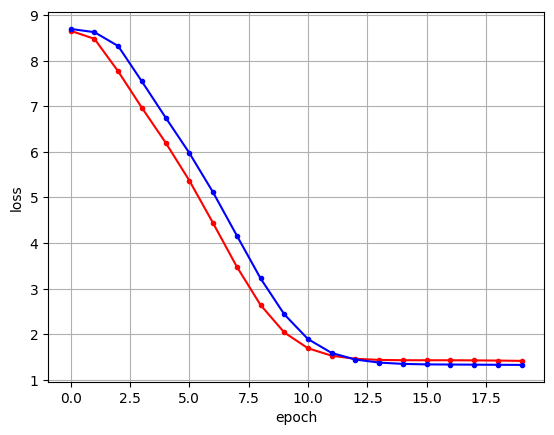

In [23]:
plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [25]:
y_predict=np.argmax(model.predict(x_test),axis=1)
y_predict

array([5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648,
       5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648,
       5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648,
       5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648,
       5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648,
       5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648,
       5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648,
       5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648,
       5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648, 5648,
       5648], dtype=int64)

In [27]:
y_test

array([5548., 5648., 5548., 5548., 5648., 5952., 5548., 5548., 5648.,
       5548., 5549., 5648., 5952., 5648., 5548., 5952., 5548., 5549.,
       5648., 5952., 5548., 5548., 5648., 5548., 5648., 5548., 5548.,
       5648., 5648., 5852., 5548., 5852., 5548., 5648., 5549., 5852.,
       5952., 5648., 5648., 5549., 5548., 5648., 5548., 5648., 5549.,
       5648., 5549., 5549., 5952., 5549., 5648., 5648., 5548., 5952.,
       5648., 5549., 5548., 5549., 5648., 5648., 5548., 5648., 5648.,
       5548., 5648., 5549., 5548., 5549., 5648., 5952., 5548., 5548.,
       5648., 5648., 5648., 5648., 5648., 5648., 5548., 5548., 5548.,
       5648., 5548., 5648., 5648., 5648., 5648., 5952., 5648., 5648.,
       5548., 5548., 5548., 6052., 5548., 5548., 5648., 5648., 5548.,
       5549.])

In [47]:
x_test

array([[5549., 5549., 5549., ...,    0.,    0.,    0.],
       [5549., 5549., 5549., ...,    0.,    0.,    0.],
       [5549., 5549., 5549., ...,    0.,    0.,    0.],
       ...,
       [5549., 5549., 5549., ...,    0.,    0.,    0.],
       [5549., 5549., 5549., ...,    0.,    0.,    0.],
       [5549., 5549., 5549., ...,    0.,    0.,    0.]])

예측값+경로

In [29]:
path_all=[]

for i in range(len(x_test)):
    line=np.array([])
    line=np.append(x_test[i],y_predict[i])
    path_all.append(line)
print(path_all)

[array([5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5548., 5548., 5548., 5548., 5548., 5548., 5548., 5548., 5548.,
       5548., 5548.

In [30]:
path_test=[]

for i in range(len(x_test)):
    line=np.array([])
    line=np.append(x_test[i],y_test[i])
    path_test.append(line)
print(path_test)

[array([5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5548., 5548., 5548., 5548., 5548., 5548., 5548., 5548., 5548.,
       5548., 5548.

In [43]:
x=range(1,531)
plt.scatter(x,path_all[3],
                   c='red', edgecolor='grey',alpha=0.5,
                   linewidth=1, marker='o',
                   s=10, label='train set')

plt.scatter(x,path_test[3],
                   c='black', edgecolor='grey',alpha=0.5,
                   linewidth=1, marker='o',
                   s=10, label='train set')


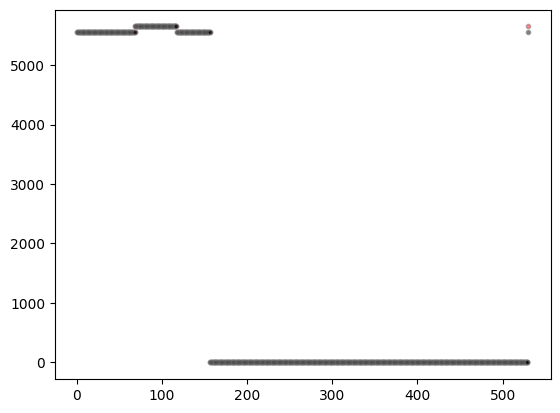

In [44]:
plt.show()

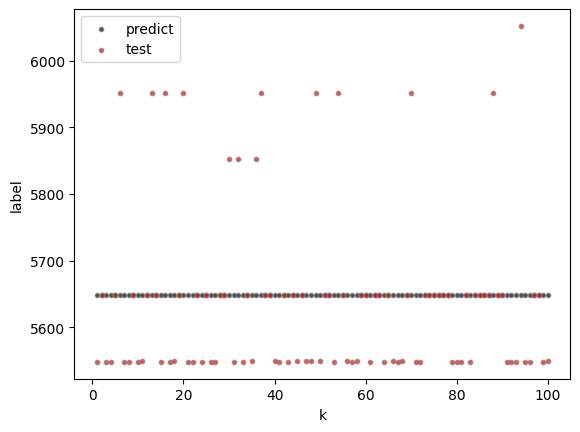

In [49]:
x=range(1,101)
plt.scatter(x,y_predict[:100],
                   c='black', edgecolor='grey',alpha=0.7,
                   linewidth=1, marker='o',
                   s=10, label='predict')
plt.scatter(x,y_test[:100],
                   c='red', edgecolor='grey',alpha=0.7,
                   linewidth=1, marker='o',
                   s=10, label='test')
plt.xlabel('k')
plt.ylabel('label')
plt.legend()
plt.show()

In [40]:
count=0
for i in range(100):
    if y_test[i]==y_predict[i]:
        count=count+1
    
acc=count/100
print(acc)

0.4
